In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_4',
                          'g_ascending_k_descending',
                          'refPTs_P_700_T_250',
                          'ng_refs_4',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_3e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_4',
                          'g_ascending_k_descending',
                          'refPTs_P_700_T_250',
                          'ng_refs_4',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.7_.7_.7_.95',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_3e-25',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 4

nref = 1

p_refs = (/ 700 /)

t_refs = (/ 250 /)

ng_refs = (/ 4 /)

data wgt
     &     /3 * .7, .95/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 3e-25

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

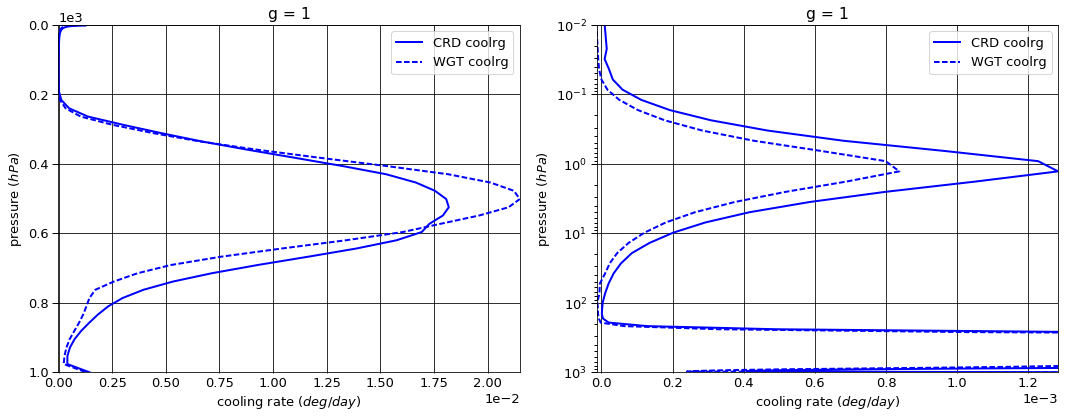

# Figure: cooling rate g-group 2

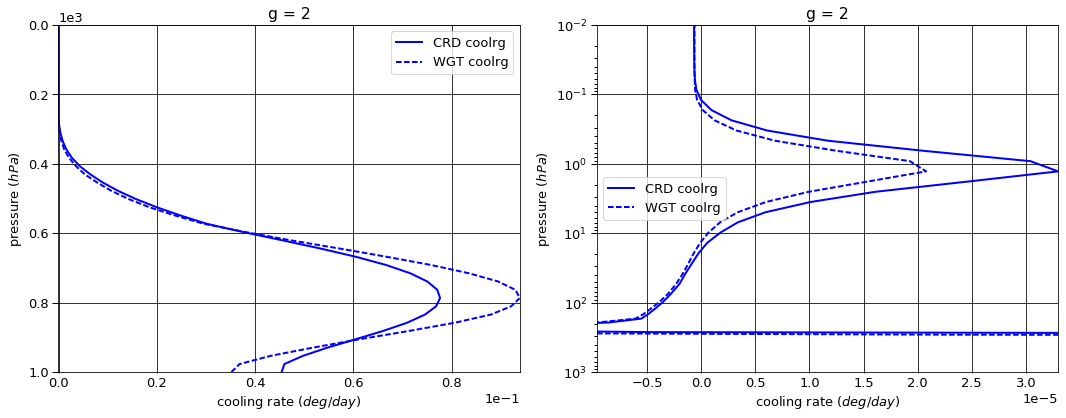

# Figure: cooling rate g-group 3

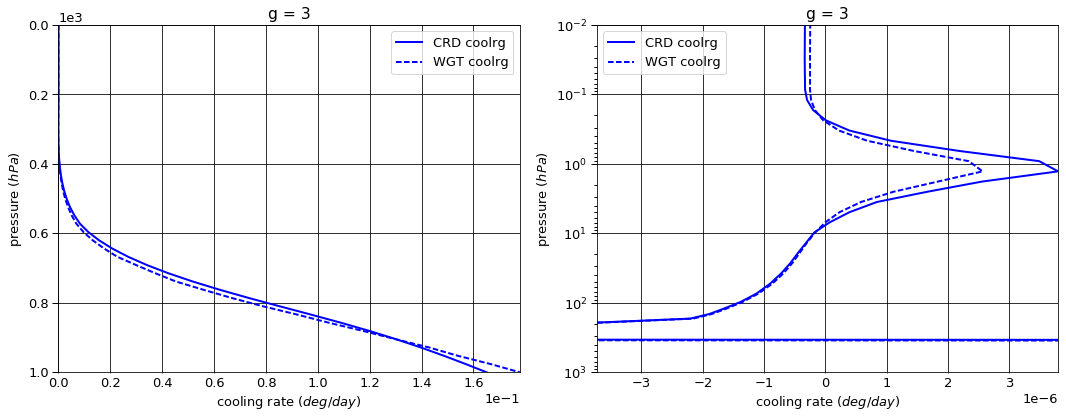

# Figure: cooling rate g-group 4

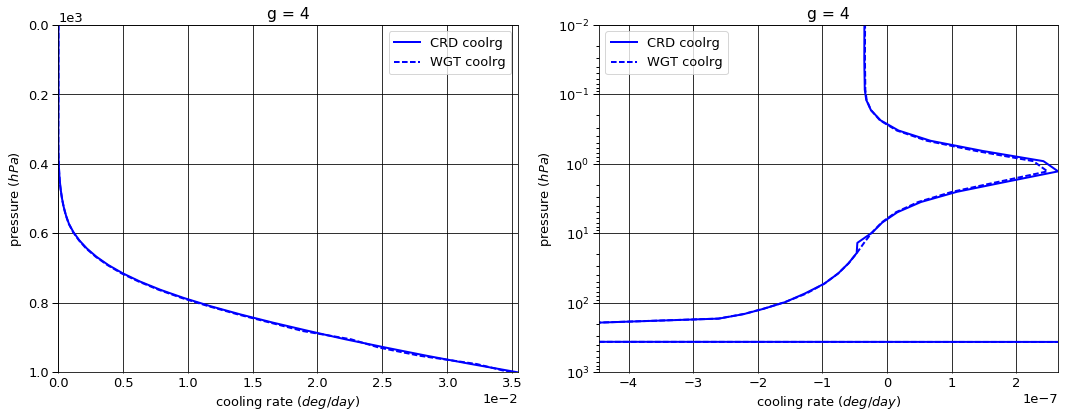

# Figure: cooling rate g-group total

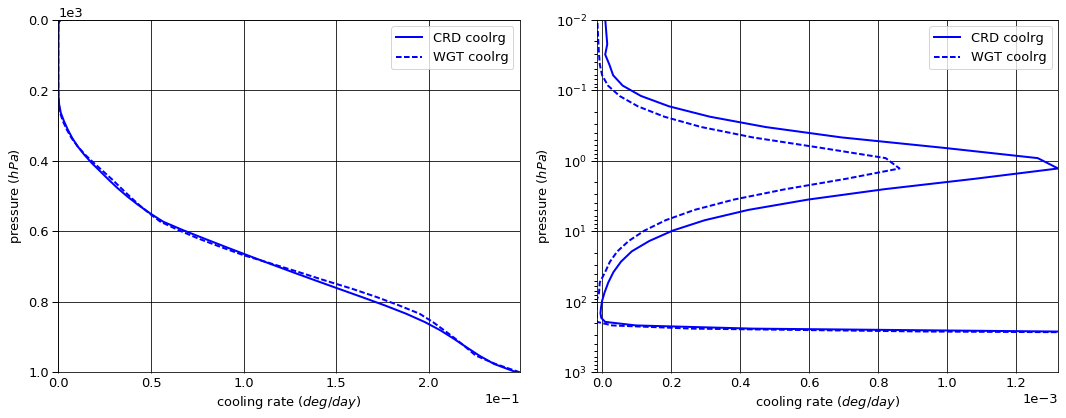

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.758025  0.000000  -0.758025
  1013.0   76     -1.257115  1.252923  -0.004192
2 0.0      1      -3.981203  0.000000  -3.981203
  1013.0   76     -4.804860  4.310444  -0.494416
3 0.0      1     -13.884560  0.000000 -13.884560
  1013.0   76    -14.392240  4.783755  -9.608485
4 0.0      1     -12.116320  0.000000 -12.116320
  1013.0   76    -12.183328  0.765540 -11.417788


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.735191  0.000000  -0.735191
  1013.0   76     -1.257115  1.253683  -0.003432
2 0.0      1      -3.929986  0.000000  -3.929986
  1013.0   76     -4.804860  4.600157  -0.204703
3 0.0      1     -13.926397  0.000000 -13.926397
  1013.0   76    -14.392240  4.649052  -9.743188
4 0.0      1     -12.117065  0.000000 -12.117065
  1013.0   76    -12.183328  0.757570 -11.425758


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.022834  0.000000  0.022834
  1013.0   76     0.000000  0.000761  0.000761
2 0.0      1      0.051217  0.000000  0.051217
  1013.0   76     0.000000  0.289713  0.289713
3 0.0      1     -0.041837  0.000000 -0.041837
  1013.0   76     0.000000 -0.134703 -0.134703
4 0.0      1     -0.000745  0.000000 -0.000745
  1013.0   76     0.000000 -0.007971 -0.007970

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -6.991619e-06
  1001.112500 75     1.446217e-03
2 0.000312    1     -6.805860e-07
  1001.112500 75     4.539726e-02
3 0.000312    1     -3.220826e-07
  1001.112500 75     1.650914e-01
4 0.000312    1     -3.434331e-08
  1001.112500 75     3.545971e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1     -2.346418e-05
  1001.112500 75     1.288075e-03
2 0.000312    1     -5.999933e-07
  1001.112500 75     3.513285e-02
3 0.000312    1     -2.376413e-07
  1001.112500 75     1.778933e-01
4 0.000312    1     -3.335864e-08
  1001.112500 75     3.490145e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.647257e-05
  1001.112500 75    -1.581425e-04
2 0.000312    1      8.059271e-08
  1001.112500 75    -1.026442e-02
3 0.000312    1      8.444132e-08
  1001.112500 75     1.280196e-02
4 0.000312    1      9.846690e-10
  1001.112500 75    -5.582630e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.740108,0.000000,-30.740108
1013.0,76,-32.637543,11.112662,-21.524881



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.708639,0.000000,-30.708639
1013.0,76,-32.637543,11.260462,-21.377081



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.031469,0.000000,0.031469
1013.0,76,0.000000,0.147799,0.147800


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000008
1001.112500,75,0.247395



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000024
1001.112500,75,0.249216



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000016
1001.112500,75,0.001821


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.038625,0.038451
2,0.147750,0.146831
3,0.441437,0.440599
4,0.372188,0.374119


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,6.068457e-23
2,4.266787e-24
3,3.000016e-25
4,4.393272e-26


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [4]
    p_refs = [700]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,6.068457e-23,NaN,0.038625,0.038451,0.038625,0.038451,700.0
2,4.266787e-24,0.070311,0.147750,0.146831,0.186375,0.185282,700.0
3,3.000016e-25,0.070311,0.441437,0.440599,0.627812,0.625881,700.0
4,4.393272e-26,0.146442,0.372188,0.374119,1.000000,1.000000,700.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  1.080081e-22  2.042920e-24  52.869436
      2     0.000312  2.239774e-25  1.941772e-26  11.534695
      3     0.000312  1.989574e-26  1.617748e-27  12.298418
      4     0.000312  2.316539e-27  1.411900e-28  16.407245
2     1     0.000750  1.086534e-22  2.046650e-24  53.088423
      2     0.000750  2.266600e-25  1.948431e-26  11.632951
      3     0.000750  2.006251e-26  1.625819e-27  12.339940
      4     0.000750  2.331428e-27  1.418528e-28  16.435542
3     1     0.001052  1.100372e-22  2.053560e-24  53.583597
      2     0.001052  2.324529e-25  1.961487e-26  11.850853
      3     0.001052  2.042068e-26  1.642308e-27  12.434134
      4     0.001052  2.363416e-27  1.431986e-28  16.504468
4     1     0.001476  1.115199e-22  2.061110e-24  54.106711
      2     0.001476  2.387488e-25  1.975305e-26  12.086677
      3     0.001476  2.080720e-26  1.660053e-27  12.534058
      4     0.001476  2.397939e-27  1.446598e-28  16.576408
5     1     0.002070  1.130224e-22  2.069027e-24  54.625857
      2     0.002070  2.452238e-25  1.989231e-26  12.327567
      3     0.002070  2.120186e-26  1.678192e-27  12.633751
      4     0.002070  2.433195e-27  1.461696e-28  16.646377
6     1     0.002904  1.145433e-22  2.077448e-24  55.136550
      2     0.002904  2.518776e-25  2.003365e-26  12.572727
      3     0.002904  2.160456e-26  1.696807e-27  12.732480
      4     0.002904  2.469172e-27  1.477378e-28  16.713207
7     1     0.004074  1.160826e-22  2.086576e-24  55.633058
      2     0.004074  2.587161e-25  2.017871e-26  12.821243
      3     0.004074  2.201559e-26  1.716037e-27  12.829322
      4     0.004074  2.505897e-27  1.493797e-28  16.775355
8     1     0.005714  1.176401e-22  2.096698e-24  56.107332
      2     0.005714  2.657461e-25  2.032996e-26  13.071649
      3     0.005714  2.243528e-26  1.736081e-27  12.922945
      4     0.005714  2.543397e-27  1.511170e-28  16.830643
9     1     0.008015  1.192158e-22  2.108216e-24  56.548199
      2     0.008015  2.729764e-25  2.049102e-26  13.321759
      3     0.008015  2.286413e-26  1.757228e-27  13.011473
      4     0.008015  2.581713e-27  1.529810e-28  16.876038
10    1     0.011243  1.208089e-22  2.121694e-24  56.939830
      2     0.011243  2.804148e-25  2.066705e-26  13.568203
      3     0.011243  2.330255e-26  1.779881e-27  13.092195
      4     0.011243  2.620878e-27  1.550148e-28  16.907274
11    1     0.015771  1.224182e-22  2.137921e-24  57.260387
      2     0.015771  2.880704e-25  2.086549e-26  13.806071
      3     0.015771  2.375112e-26  1.804617e-27  13.161309
      4     0.015771  2.660930e-27  1.572798e-28  16.918452
12    1     0.022122  1.240430e-22  2.158007e-24  57.480371
      2     0.022122  2.959594e-25  2.109702e-26  14.028495
      3     0.022122  2.421081e-26  1.832266e-27  13.213590
      4     0.022122  2.701947e-27  1.598639e-28  16.901537
13    1     0.031031  1.256825e-22  2.183497e-24  57.560179
      2     0.031031  3.041030e-25  2.137687e-26  14.225795
      3     0.031031  2.468298e-26  1.864011e-27  13.241866
      4     0.031031  2.744025e-27  1.628920e-28  16.845676
14    1     0.043528  1.274438e-22  2.217049e-24  57.483557
      2     0.043528  3.130642e-25  2.173412e-26  14.404273
      3     0.043528  2.520003e-26  1.902770e-27  13.243864
      4     0.043528  2.790038e-27  1.666519e-28  16.741711
15    1     0.061057  1.328181e-22  2.278763e-24  58.285172
      2     0.061057  3.406257e-25  2.243085e-26  15.185589
      3     0.061057  2.676441e-26  1.990947e-27  13.443054
      4     0.061057  2.929825e-27  1.750823e-28  16.733991
16    1     0.085645  1.483414e-22  2.408259e-24  61.596931
      2     0.085645  4.261415e-25  2.385948e-26  17.860468
      3     0.085645  3.145045e-26  2.203926e-27  14.270191
      4     0.085645  3.350448e-27  1.961997e-28  17.076725
17    1     0.120136  1.732894e-22  2.615969e-24  66

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
